In [1]:
import pandas as pd
import os
import time
import numpy as np
import torch

In [2]:
import seaborn as sns
from scipy import stats
from statistics import NormalDist
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
#physical_devices = tf.config.list_physical_devices('CPU')
physical_devices = tf.config.list_physical_devices('GPU')

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [4]:
#device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device


device(type='cuda', index=0)

# Confirmatory Analysis
>
> Conformatory Experiments of Logits or Next Token Predictions @danaderp
>

In [5]:
def params(): 
    return {
            'testbed' : '/workspaces/CausalCodeCapability/data/big_table/testbed_base_EleutherAI-gpt-neo-1.3B.csv',
            'hf_model' : 'EleutherAI/gpt-neo-1.3B' 
}

In [6]:
#pwd
parameters = params()
parameters['testbed']

'/workspaces/CausalCodeCapability/data/big_table/testbed_base_EleutherAI-gpt-neo-1.3B.csv'

# Data Upload

In [9]:
data_pd = pd.read_csv( 
                      parameters['testbed'] , 
                      index_col=0
            )

In [11]:
data_pd.head(1)

,whole_func_string,ast_concepts,model_tokenizer_concepts,model_input_ids,model_total_input_ids,max_prob_case,min_prob_case,actual_prob_case
0,"def gen_filter(name, op, value, is_or=False):\...","[('def', 'def', 'function_definition'), ('gen_...","[(4299, 'def', 'function_definition'), (2429, ...","[4299, 2429, 62, 24455, 7, 3672, 11, 1034, 11,...",123,"[('module', tensor([0.3343], grad_fn=<TopkBack...","[('ĠPremiership', tensor([8.5841e-14], grad_fn...","[('Ġgen', tensor(0.0002, grad_fn=<SelectBackwa..."


In [12]:
data_pd.describe()

,model_total_input_ids
count,100.000000
mean,355.800000
std,338.974776
min,67.000000
25%,145.750000
50%,241.500000
75%,420.250000
max,1675.000000


## Statistical Analysis

In [23]:
type(list(data_pd.actual_prob_case.values[0]))

list

In [24]:
list(data_pd.actual_prob_case.values[0])

['[',
 '(',
 "'",
 'Ġ',
 'g',
 'e',
 'n',
 "'",
 ',',
 ' ',
 't',
 'e',
 'n',
 's',
 'o',
 'r',
 '(',
 '0',
 '.',
 '0',
 '0',
 '0',
 '2',
 ',',
 ' ',
 'g',
 'r',
 'a',
 'd',
 '_',
 'f',
 'n',
 '=',
 '<',
 'S',
 'e',
 'l',
 'e',
 'c',
 't',
 'B',
 'a',
 'c',
 'k',
 'w',
 'a',
 'r',
 'd',
 '0',
 '>',
 ')',
 ')',
 ',',
 ' ',
 '(',
 "'",
 '_',
 "'",
 ',',
 ' ',
 't',
 'e',
 'n',
 's',
 'o',
 'r',
 '(',
 '0',
 '.',
 '6',
 '2',
 '3',
 '5',
 ',',
 ' ',
 'g',
 'r',
 'a',
 'd',
 '_',
 'f',
 'n',
 '=',
 '<',
 'S',
 'e',
 'l',
 'e',
 'c',
 't',
 'B',
 'a',
 'c',
 'k',
 'w',
 'a',
 'r',
 'd',
 '0',
 '>',
 ')',
 ')',
 ',',
 ' ',
 '(',
 "'",
 'f',
 'i',
 'l',
 't',
 'e',
 'r',
 "'",
 ',',
 ' ',
 't',
 'e',
 'n',
 's',
 'o',
 'r',
 '(',
 '0',
 '.',
 '0',
 '0',
 '0',
 '9',
 ',',
 ' ',
 'g',
 'r',
 'a',
 'd',
 '_',
 'f',
 'n',
 '=',
 '<',
 'S',
 'e',
 'l',
 'e',
 'c',
 't',
 'B',
 'a',
 'c',
 'k',
 'w',
 'a',
 'r',
 'd',
 '0',
 '>',
 ')',
 ')',
 ',',
 ' ',
 '(',
 "'",
 '(',
 "'",
 ',',
 ' ',
 't',
 'e'

In [18]:
data_pd.actual_prob_case.values[0][0]

'['

In [177]:
child_logits = {}
parent_logits = {}

for i,sequence in enumerate( data_pd.actual_prob_case.values ):
    #print(sequence)
    tok_tuple_list = eval( data_pd.model_tokenizer_concepts.values[i] )
    for j,label_tuple in enumerate( tok_tuple_list[1:] ): #Dropping first token
        if label_tuple[1] in set( child_logits.keys() ):
            #print('in',label_tuple,sequence[j])
            child_logits[label_tuple[1]].append( sequence[j][1] )
        else:
            #print('out',label_tuple,sequence[j])
            child_logits[label_tuple[1]] = []
            child_logits[label_tuple[1]].append( sequence[j][1] )
            
        ### PARENT
        if label_tuple[1] in set( parent_logits.keys() ):
            #print('in',label_tuple,sequence[j])
            parent_logits[label_tuple[2]].append( sequence[j][1] )
        else:
            #print('out',label_tuple,sequence[j])
            parent_logits[label_tuple[2]] = []
            parent_logits[label_tuple[2]].append( sequence[j][1] )

In [253]:
parent_logits['function_definition']

[tensor(4.9403e-07, grad_fn=<SelectBackward0>)]

In [185]:
parent_logits.keys()

dict_keys(['function_definition', 'parameters', 'default_parameter', 'ERROR', 'expression_statement', 'if_statement', 'comparison_operator', 'raise_statement', 'call', 'argument_list', 'attribute', 'assignment', 'binary_operator', 'return_statement', 'global_statement', 'block', 'try_statement', 'lambda', 'lambda_parameters', 'not_operator', 'boolean_operator', 'dictionary', 'subscript', 'elif_clause', 'pass_statement', 'finally_clause', 'for_statement', 'keyword_argument', 'pair', 'dictionary_comprehension', 'for_in_clause', 'pattern_list', 'if_clause', 'list_splat_pattern', 'augmented_assignment', 'parenthesized_expression', 'tuple', 'else_clause', 'list', 'slice', 'list_comprehension', 'except_clause', 'unary_operator', 'yield', 'import_from_statement', 'dotted_name', 'dictionary_splat_pattern', 'tuple_pattern', 'list_splat', 'dictionary_splat', 'with_statement', 'as_pattern', 'as_pattern_target', 'conditional_expression', 'concatenated_string', 'generator_expression', 'expression_l

In [197]:
[ (elem,np.mean( [np_elem.detach().numpy() for np_elem in parent_logits[elem] ] )) for elem in parent_logits.keys()]

[('function_definition', 4.9402684e-07),
 ('parameters', 0.45352417),
 ('default_parameter', 0.49697953),
 ('ERROR', 0.96551734),
 ('expression_statement', 0.96332645),
 ('if_statement', 0.35947895),
 ('comparison_operator', 0.49701786),
 ('raise_statement', 0.5022117),
 ('call', 0.09397892),
 ('argument_list', 0.9793428),
 ('attribute', 0.55561125),
 ('assignment', 0.9822823),
 ('binary_operator', 0.93023354),
 ('return_statement', 0.062402897),
 ('global_statement', 0.12389463),
 ('block', 0.04229165),
 ('try_statement', 0.9985191),
 ('lambda', 0.8635597),
 ('lambda_parameters', 0.9691714),
 ('not_operator', 0.99964225),
 ('boolean_operator', 0.29123697),
 ('dictionary', 0.7888982),
 ('subscript', 0.95072013),
 ('elif_clause', 0.5141071),
 ('pass_statement', 0.15036604),
 ('finally_clause', 0.99995124),
 ('for_statement', 0.9405241),
 ('keyword_argument', 0.9812852),
 ('pair', 0.874644),
 ('dictionary_comprehension', 0.6176669),
 ('for_in_clause', 0.9983662),
 ('pattern_list', 0.0209

In [199]:
[ (elem,np.mean( [np_elem.detach().numpy() for np_elem in child_logits[elem] ] )) for elem in child_logits.keys()]

[('identifier', 0.5504931),
 ('(', 0.6492624),
 (',', 0.6478024),
 ('=', 0.73198533),
 ('false', 0.42686236),
 (')', 0.62872636),
 ('ERROR', 0.96551734),
 ('string', 0.621419),
 ('if', 0.2772697),
 ('not', 0.22935918),
 ('in', 0.82017523),
 (':', 0.8133965),
 ('raise', 0.5658),
 ('+', 0.41851243),
 ('return', 0.41479897),
 ('global', 0.06456195),
 ('.', 0.7721778),
 ('float', 0.42957017),
 ('*', 0.2961083),
 ('none', 0.673475),
 ('comment', 0.31376114),
 ('try', 0.027253374),
 ('true', 0.62086904),
 ('lambda', 0.58812237),
 ('or', 0.110503495),
 ('}', 0.5254813),
 ('[', 0.5780259),
 ('elif', 0.55802226),
 ('pass', 0.17900899),
 ('finally', 0.07824747),
 ('for', 0.45117524),
 ('integer', 0.48820278),
 ('-', 0.32622436),
 ('{', 0.17415868),
 ('%', 0.84188503),
 (']', 0.6644342),
 ('|=', 0.5004129),
 ('&', 0.6276737),
 ('is', 0.6191611),
 ('else', 0.5030283),
 ('<', 0.29024956),
 ('and', 0.19557978),
 ('>', 0.20081393),
 ('except', 0.73677486),
 ('==', 0.43423653),
 ('def', 0.15680842),
 

## Bootstrapping 

In [203]:
#export
def bootstrapping( np_data, np_func, size ):
    """Create a bootstrap sample given data and a function
    For instance, a bootstrap sample of means, or mediands. 
    The bootstrap replicates are a long as the original size
    we can choose any observation more than once (resampling with replacement:np.random.choice)
    """
    
    #Cleaning NaNs
    #np_data_clean = np_data[ np.logical_not( np.isnan(np_data) ) ] 
    
    #The size of the bootstrap replicate is as big as size
    #Creating the boostrap replicates as long as the orignal data size
    #This strategy might work as imputation 
    bootstrap_repl = [ np_func( np.random.choice( np_data, size=len(np_data) ) ) for i in range( size ) ]
    
    #logging.info("Covariate: " + cov) #Empirical Mean
    #logging.info("Empirical Mean: " + str(np.mean(np_data_clean))) #Empirical Mean
    #logging.info("Bootstrapped Mean: " + str( np.mean(bootstrap_repl) ) ) #Bootstrapped Mean
    
    return np.array( bootstrap_repl )

In [212]:
def dictionary_boots( dict_concepts, np_func = np.mean, size=500):
    np_dettached = lambda np_ccp: np.array([ np_elem.detach().numpy() for np_elem in np_ccp ]).flatten()
    return {ccp: bootstrapping(np_dettached( dict_concepts[ccp] ), np_func, size) for ccp in dict_concepts.keys()}

In [213]:
dict_test = dictionary_boots(
    dict_concepts = parent_logits
)

In [234]:
pd_test_bs = pd.DataFrame.from_dict( dict_test )

In [235]:
pd_test_bs.head()

,function_definition,parameters,default_parameter,ERROR,expression_statement,if_statement,comparison_operator,raise_statement,call,argument_list,...,expression_list,typed_default_parameter,type,while_statement,import_statement,aliased_import,class_definition,continue_statement,set_comprehension,assert_statement
0,4.940268e-07,0.453524,0.49698,0.963887,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569
1,4.940268e-07,0.453524,0.49698,0.964926,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569
2,4.940268e-07,0.453524,0.49698,0.965100,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569
3,4.940268e-07,0.453524,0.49698,0.966258,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569
4,4.940268e-07,0.453524,0.49698,0.965908,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569


In [251]:
pd_test_bs.describe()

,function_definition,parameters,default_parameter,ERROR,expression_statement,if_statement,comparison_operator,raise_statement,call,argument_list,...,expression_list,typed_default_parameter,type,while_statement,import_statement,aliased_import,class_definition,continue_statement,set_comprehension,assert_statement
count,5.000000e+02,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.940268e-07,0.453524,0.49698,0.965559,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255989,0.000065,0.995736,0.269588,0.878069,0.003569
std,0.000000e+00,0.000000,0.00000,0.001098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min,4.940268e-07,0.453524,0.49698,0.961945,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569
25%,4.940268e-07,0.453524,0.49698,0.964908,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569
50%,4.940268e-07,0.453524,0.49698,0.965573,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569
75%,4.940268e-07,0.453524,0.49698,0.966248,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569
max,4.940268e-07,0.453524,0.49698,0.969271,0.963326,0.359479,0.497018,0.502212,0.093979,0.979343,...,0.999519,0.066759,0.336859,0.531041,0.255988,0.000065,0.995736,0.269588,0.878069,0.003569


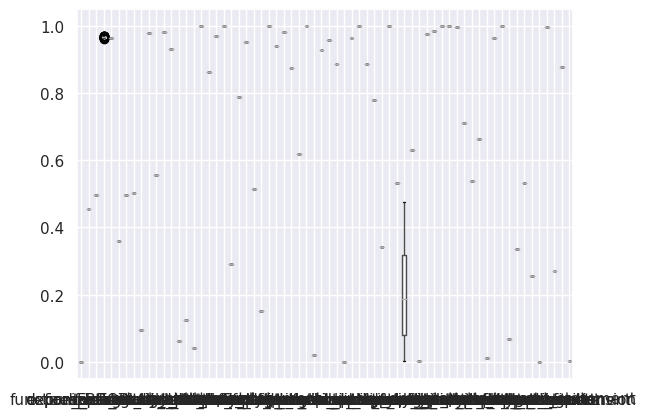

In [254]:
sns.set_theme(style="darkgrid")
boxplot = pd_test_bs.boxplot()
plt.show()

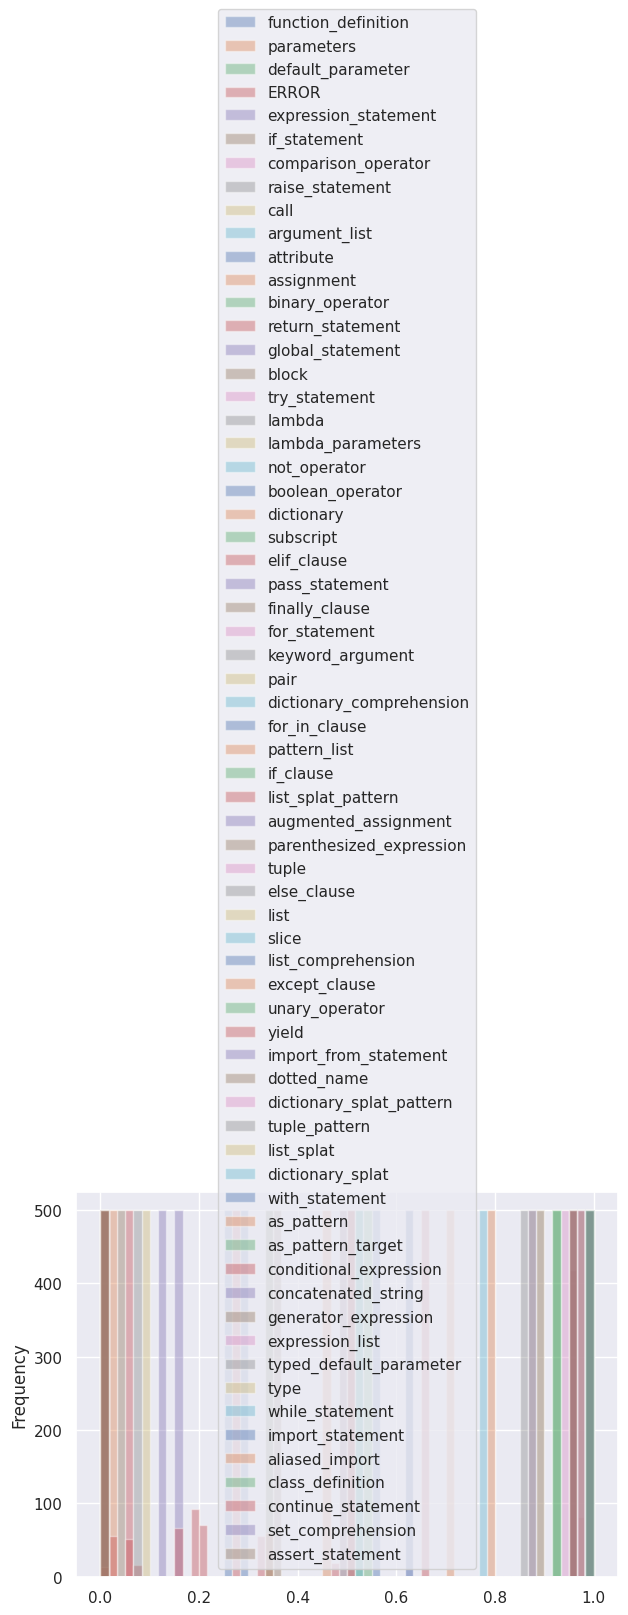

In [250]:
sns.set_theme(style="darkgrid")
#ax = pd_test_bs.plot.kde()
pd_test_bs.plot.hist(
    bins=60, 
    alpha=0.4,
    figsize=(7,5)
)
plt.show()

In [218]:
assert len(dict_test['function_definition']) == len(dict_test['argument_list']) 

In [226]:
#export
#We use normal distribution assuming the sample size is big enough (~more than 100 points)
def confidence_intervals_v1(np_data_bs, conf=0.95):
    """Confidence Intervals with Gaussian Distribution (n>=30)"""
    CI = stats.norm.interval(alpha=conf, loc = np.mean( np_data_bs ), scale = stats.sem(np_data_bs))
    return CI

In [231]:
#export
#see https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
def confidence_intervals_v2(data, confidence=0.95):
    dist = NormalDist.from_samples(data)
    z = NormalDist().inv_cdf((1 + confidence) / 2.)
    h = dist.stdev * z / ((len(data) - 1) ** .5)
    return dist.mean - h, dist.mean + h, h

In [232]:
dict_test_intervals = {k: confidence_intervals_v2(dict_test[k]) for k in dict_test.keys() }

In [233]:
dict_test_intervals

{'function_definition': (4.940268354403088e-07, 4.940268354403088e-07, 0.0),
 'parameters': (0.4535241723060608, 0.4535241723060608, 0.0),
 'default_parameter': (0.4969795346260071, 0.4969795346260071, 0.0),
 'ERROR': (0.965463052576959, 0.9656556741533877, 9.631078821433487e-05),
 'expression_statement': (0.9633264541625977, 0.9633264541625977, 0.0),
 'if_statement': (0.3594789505004883, 0.3594789505004883, 0.0),
 'comparison_operator': (0.49701786041259766, 0.49701786041259766, 0.0),
 'raise_statement': (0.5022116899490356, 0.5022116899490356, 0.0),
 'call': (0.09397891908884048, 0.09397891908884048, 0.0),
 'argument_list': (0.9793428182601929, 0.9793428182601929, 0.0),
 'attribute': (0.555611252784729, 0.555611252784729, 0.0),
 'assignment': (0.982282280921936, 0.982282280921936, 0.0),
 'binary_operator': (0.9302335381507874, 0.9302335381507874, 0.0),
 'return_statement': (0.06240289658308029, 0.06240289658308029, 0.0),
 'global_statement': (0.12389463186264038, 0.12389463186264038,